# Preprocessing

Rename Masbaisis_indices_280619.xlsx to Masbasis_indices_280619.xlsx

In [1]:
%%time

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from math import sqrt

import seaborn as sns
from copy import copy

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',105)
# columns_df

Wall time: 1.67 s


In [2]:
%%time

# Prints the current workinig directory
os.getcwd()
# os.listdir()

Wall time: 0 ns


'C:\\Users\\fahad\\Documents\\GitHub\\vPheno'

## ToDo:  
  
2019 2020 data is fine  
Cant use 2017 because of the blue band  
Distt is not normal in 2018 robot  
AREA UNDER THE CURVE in each season for 2018 2017  

## Doing Manual work to involve grain yield
## ToDo: Must automate

## Importing Data

In [3]:
%%time

path = r'C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021'
# path = path.replace("\\", "/")+'/'
os.listdir(path)

Wall time: 0 ns


['Graminor_2019', 'Masbasis_2019', 'Staur_2019', 'Vollebekke-total_2020']

## Data Preparation
### Creating list of all files

In [4]:
%%time

# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address))
# files_with_address
# files_list
files_with_address_bkp = copy(files_with_address)

87
Wall time: 8.05 ms


## Data Checking/control

### Check for duplicate filenames

In [5]:
%%time

print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list)- len(set(files_list)),'duplicate file name/names.')

Total number of files are : 87
Number of unique file names are: 86
There is/are 1 duplicate file name/names.
Wall time: 3.51 ms


### Testing: Get all the files with their paths from the data directory in a dict

In [6]:
# %%time

# file_w_address_test = files_with_address[1]

# # Get filename from path
# os.path.basename(file_w_address_test)

# # Get directory path name from path
# os.path.dirname(file_w_address_test)

# # Get directory name from path
# os.path.basename(os.path.dirname(file_w_address_test))

# # File name without extension
# os.path.splitext(os.path.basename(file_w_address_test))[0]
# 
# # File Extension
# os.path.splitext(os.path.basename(file_w_address_test))[1]

### Checking if there are multiple sheets in the files

In [7]:
%%time

# Print number of sheets in all files
print('The following files have multiple sheets.')

list_multi_sheet = []
for file in files_with_address:
    
    xl_file = pd.ExcelFile(file,engine='openpyxl')
    number_of_sheets = len(xl_file.sheet_names)
    if number_of_sheets > 1:
        print(number_of_sheets, os.path.basename(file), 'in folder', os.path.basename(os.path.dirname(file))
)
        list_multi_sheet.append(file)

The following files have multiple sheets.
4 19TvPhenores.xlsx in folder Graminor_2019
4 19TvPhenores.xlsx in folder Staur_2019
3 20BMLGI1_2020_tm.xlsx in folder Masbasis
3 Masbasis_Mica_2020_all_dates_MEDIAN_DP.xlsx in folder Masbasis
3 ROBOT_2020.xlsx in folder Robot
Wall time: 7.07 s


### Removing files with multiple sheets from the list

In [8]:
%%time

# Removing files with multiple sheets from the list

for i in list_multi_sheet:
    files_with_address.remove(i)
len(files_with_address)

Wall time: 0 ns


82

### Removing files without dates
(with 2019 in name means they dont have date format)

In [9]:
%%time

files_w_2019 = []
for file in files_with_address:
    file_name = os.path.basename(file)
    if '2019' in file_name:
        print(file_name, 'in folder', os.path.basename(os.path.dirname(file)))
        files_w_2019.append(file)

Field_data_2019.xlsx in folder Masbasis_2019
Masbasis_2019_ForDP_median.xlsx in folder Masbasis_2019
Masbasis_2606_2019_color and othe indecies.xlsx in folder Masbasis_2019
Staur_Graminor_2019_median.xlsx in folder Staur_2019
Staur_Masbasis_2019.xlsx in folder Staur_2019
Wall time: 0 ns


In [10]:
%%time

# Removing from list
for i in files_w_2019:
    print(i)
    files_with_address.remove(i)

C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Masbasis_2019\Field_data_2019.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Masbasis_2019\Masbasis_2019_ForDP_median.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Masbasis_2019\Masbasis_2606_2019_color and othe indecies.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Staur_2019\Staur_Graminor_2019_median.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Staur_2019\Staur_Masbasis_2019.xlsx
Wall time: 0 ns


In [11]:
%%time

len(files_with_address)
# files_with_address

Wall time: 0 ns


77

## Importing data files to Pandas

In [12]:
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

#     # Parent dir
#     dir1_name = os.path.basename(os.path.dirname(data))
#     # grand parent dir
#     dir2_name = os.path.basename(os.path.dirname(os.path.dirname(data)))

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(")", "")

    all_df.append(df_name)

    print(df_name)
    locals()[df_name] = pd.read_excel(data, engine='openpyxl')
# all_df

Graminor_070819_2
Graminor_150819
Graminor_east_050819
Graminor_west_050819
Graminor-250719
Graminor_050719
Graminor_150719
Graminor_220719_corrected
Graminor_east_020719
Graminor_east_110719
Graminor_west_020719
Graminor_060619
Graminor_110619
Graminor_280619_corrected
Graminor_east_250619_corrected
Graminor_west_250619_correct
Masbasis_050719
Masbasis_050719_corrected
Masbasis_060619_Indices
Masbasis_070819
Masbasis_070819_correct
Masbasis_110619
Masbasis_150719
Masbasis_220719
Masbasis_220719_correct
Masbasis_290719
Masbasis_indices_280619
Graminor_east_010720
Graminor_east_040720
Graminor_east_040820
Graminor_east_070720_correct
Graminor_east_090720
Graminor_east_130720
Graminor_east_140820
Graminor_east_170720.cpg
Graminor_east_180620
Graminor_east_200720
Graminor_east_240620_correct
Graminor_east_300720.shp
Graminor_Mica_west_240620
Graminor_west_040720
Graminor_west_040820
Graminor_west_070720
Graminor_west_070720_correct
Graminor_west_090720
Graminor_west_130720
Graminor_west_1

## ToDo: Dropping NAN? If any???

## ToDo: Drop duplicate plots in the datasets

## Data Control: Check which df have the data column heading we need

### Listing column headings into df

In [13]:
%%time

# Finding max number of columns in all df

len_columns = []
for df in all_df:
    cols_df = locals()[df].columns
    len_columns.append(len(cols_df))
max_cols_in_df = max(len_columns)

# Now creating a empty df to collect all column headings
columns_df = pd.DataFrame(data=range(0,max_cols_in_df), columns = ['ID'])
columns_df.drop('ID', axis=1, inplace=True)

for df in all_df:
    cols_df = locals()[df].columns
    columns_df[df] = pd.Series(cols_df)


Wall time: 49.6 ms


### Convert columns_df to dictoionary

In [14]:
%%time

# Function to convert df to dict while dropping nan in each column separately

def comp_dropna(df1):
    return {k: v.dropna().to_dict() for k,v in df1.items()}

columns_dict = comp_dropna(columns_df)
# columns_dict

Wall time: 18 ms


In [15]:
id_cols_var = ['id', 'plot','df']

x = 'plot'

if x in id_cols_var:
    print(x)

plot


### Finding Column heading with the text we are looking for in

In [16]:
%%time

# Find columns with key from the following list
# Rename the founc columns to the values against the keys
find_cols = {
    'id': 'Plot_ID',
    'plot': 'Plot_ID',
    'Blue': 'Blue',
    'Gre': 'Green',
    'Red': 'Red',
    'RedE': 'RedEdge',
    'NIR': 'NIR',
    'NDVI': 'NDVI',
    'MTCI': 'MTCI'
}

id_cols_var = ['id', 'plot']

dtype_f = {0: '_Mean_Value', 1: '_Median_Value', 2: '_Std_Dev_Value'}
num_std_dtype_colunms = len(dtype_f)

list_ok_df_per_query = []
list_problem_df_per_query = []

for query, query_f in find_cols.items():
    
    # First, we loop through all df to find the max of number of relavant columns in any df
    num_col_found_all = []
    for df, cols_dict in columns_dict.items():

        # List to save the relavant columns found in the df
        cols_found = []
        
        # Loop through all column names
        for key, item in cols_dict.items():
            
            # Check if required text is in colmn name,i.e. item
            
            # Ensure first that the text does not contain 'count' and 'sum' in it
            if item.lower().find('sum'.lower()) == -1 and item.lower().find('count'.lower()) == -1:
            
                # When searching for Red, search for red but ignore RedEdge,i.e. RedE
                if query.lower()=='red':
                    if item.lower().find(query.lower()) != -1 and item.lower().find('RedE'.lower()) == -1:
                        cols_found.append(item)

                # For the rest also checking we do not get 'GNDVI' columns. Don't neet them yet
                elif item.lower().find(query.lower()) != -1 and item.lower().find('GNDVI'.lower()) == -1:
                    cols_found.append(item)

        num_col_found_all.append(len(cols_found))
    max_cols = max(num_col_found_all)
#     print(query, max_cols)

    # Define a df for saving the columns found if num of col is not num_std_dtype_colunms
    temp_df_non_std_cols = 'col_df_non_std_cols_'+query
    
    # Add a condition in data if no columns found, then still create a df with 1 column
    locals()[temp_df_non_std_cols] = pd.DataFrame(data=range(0,max_cols) if max_cols > 1 else range(0,1),
                                                  columns = [query])
    list_problem_df_per_query.append(temp_df_non_std_cols)
    
    # Define a df for saving the columns found if num of col is num_std_dtype_colunms
    temp_df_std_cols= 'col_df_std_cols_'+query
    locals()[temp_df_std_cols] = pd.DataFrame(data=range(0,num_std_dtype_colunms), columns = [query])
    list_ok_df_per_query.append(temp_df_std_cols)
    
    
    
    # Now we again loop and append those columns to a relavant df for each query
    
    for df, cols_dict in columns_dict.items():

        # List to save the relavant columns found in the df
        cols_found = []

        # Loop through all column names
        for key, item in cols_dict.items():

            # Check if required text is in colmn name,i.e. item
            
            # Ensure first that the text does not contain 'count' and 'sum' in it
            if item.lower().find('sum'.lower()) == -1 and item.lower().find('count'.lower()) == -1 and item.lower().find('GreenND'.lower()) == -1:
            
                # When searching for Red, search for red but ignore RedEdge,i.e. RedE
                if query.lower()=='red':
                    if item.lower().find(query.lower()) != -1 and item.lower().find('RedE'.lower()) == -1:
                        cols_found.append(item)

                # For the rest also checking we do not get 'GNDVI' columns. Don't neet them yet
                elif item.lower().find(query.lower()) != -1 and item.lower().find('GNDVI'.lower()) == -1:
                    cols_found.append(item)

        # Adding the found values to a column in dataframe
        
        # For non standard columns
        if len(cols_found) != num_std_dtype_colunms and query not in id_cols_var:
            locals()[temp_df_non_std_cols][df] = pd.Series(cols_found, dtype='str')
        
        # For standrd columns
        if len(cols_found) == num_std_dtype_colunms or query in id_cols_var:
            locals()[temp_df_std_cols][df] = pd.Series(cols_found, dtype='str')
            

        if query in id_cols_var:
            num_id_cols = 0
            for temp_query in id_cols_var:
                for column in cols_dict.values():
                    if column.lower().find(temp_query.lower()) == 0:
                        num_id_cols += 1
            if num_id_cols !=1:
                if num_id_cols == 0:
                    print(query, 'Error: ID column not found in' ,df)
                else:
                    print('Error: More than one ID column found in ' ,df)
    
    # Dropping the empty query named column from the columns dataframe
    # For non standard columns
    locals()[temp_df_non_std_cols].drop(query, axis=1, inplace=True)
    # For standrd columns
    locals()[temp_df_std_cols].drop(query, axis=1, inplace=True)

    
    # Drop extra empty rows if the query is id or plot
    # Drop empty columns, where the id is different than the one being checked
    # Drop first column with 
    # Assumption: There is only one id columns in each df
    # Assumption being checked in previous loop
    if query in id_cols_var:
        locals()[temp_df_std_cols].drop([1, 2], axis=0, inplace=True)
        locals()[temp_df_std_cols].dropna(axis=1, inplace=True)
    
    
#     # ===========================Start_of_Analysis_1================================
#     # Analysis Part: Uncomment for new data
#     # Confirm if all row elements corresopnd to data aggregation types in the dict
    
    
#     agg_types_dict = {0:'mea', 1:'med', 2:'st'}
    
#     if query in id_cols_var:
#         pass
#     else:
#         for key, agg_type in agg_types_dict.items():
#             check_df = locals()[temp_df_std_cols]#.drop(query, axis=1)
#             for row_item in check_df.iloc[key].tolist():
#                 if str(row_item).lower().find(agg_type) == -1:
#                     print(row_item, key, agg_type)
                
#     print(query, locals()[temp_df_std_cols].shape)
#     display(locals()[temp_df_std_cols])
    
#     # Analysis shows that for df with num_std_dtype_colunms relavant column names; 
#     # green and RedEdge columns have naming problems where the agg_types are
#     # not the same for mea and med for some green columns
#     # and mea, med, and st for most of the RedEdge columns
#     # =============================End_of_Analysis_1================================





    # ===========================Start_of_Analysis_2================================
    # Analysis Part: Uncomment for new data
    # Renaming the column names to standard names 
    # Renaming based on the rule that the first name is mean, second is median and 
    # the third is standard deviation.
    # This assumption has been partially checked and confirmed in Analysis_1
    
    # The id column has to be dealed separately since it does not have 
    # num_std_dtype_colunms variations i.e. mean, median, and std_dev
    df_found_correct_cols = locals()[temp_df_std_cols].shape[1]
    renamed_count = 0
    if query in id_cols_var:
        for x, y in locals()[temp_df_std_cols].items():
            locals()[x].rename({y[0]: query_f}, axis=1, inplace=True)
            print(f'Renamed {query_f} column for dataframe {x} against value {y[0]}')
            renamed_count += 1

    else:
        for x, y in locals()[temp_df_std_cols].items():
            locals()[x].rename({y[0]: query_f+dtype_f[0], y[1]: query_f+dtype_f[1],\
                                y[2]: query_f+dtype_f[2]}, axis=1, inplace=True)
#             print(f'Renamed {query_f} columns for dataframe {x}')
            renamed_count += 1
    print(f'{query_f} column renamed in {renamed_count} of {df_found_correct_cols} found dataframes')
#     display(locals()[temp_df_std_cols].shape[2])
    
    # =============================End_of_Analysis_2================================

    
    
    
    
    
    
#     # ===========================Start_of_Analysis_3================================
#     # Analysis Part: Uncomment for new data
#     # Checking the uncommon column names/combination or df with extra columns that 
#     # make finding the correct data confusing

#     print(temp_df_non_std_cols)
#     display(locals()[temp_df_non_std_cols])
    
    
#     # After manual analysis, found the followind
#     # Graminor_070819 (2): Green data columns are twice 
#     #      Drop the following: drop _Greenme_1, _Greenme_2, _Greenst_1
#     # Graminor_east_010720: Blue Mean twice 
#     #      drop: _Bluemean
#     # Masbasis_Mica_130720: MTCI Double 
#     #      drop: _MTCImea_1, _MTCImed_1, _MTCIstd_1
#     #
#     # More incomplete dsecrepencies
#     # Graminor_east_090720: In addition to other data,
#     #      drop: _Bluemean

#     # =============================End_of_Analysis_3================================
    




Renamed Plot_ID column for dataframe Graminor_070819_2 against value id
Renamed Plot_ID column for dataframe Graminor_150819 against value id
Renamed Plot_ID column for dataframe Graminor_east_050819 against value id
Renamed Plot_ID column for dataframe Graminor_west_050819 against value id
Renamed Plot_ID column for dataframe Graminor-250719 against value id
Renamed Plot_ID column for dataframe Graminor_050719 against value id
Renamed Plot_ID column for dataframe Graminor_150719 against value id
Renamed Plot_ID column for dataframe Graminor_220719_corrected against value id
Renamed Plot_ID column for dataframe Graminor_east_020719 against value id
Renamed Plot_ID column for dataframe Graminor_east_110719 against value id
Renamed Plot_ID column for dataframe Graminor_west_020719 against value id
Renamed Plot_ID column for dataframe Graminor_060619 against value id
Renamed Plot_ID column for dataframe Graminor_110619 against value id
Renamed Plot_ID column for dataframe Graminor_280619_

### List of df with problems

In [17]:
%%time

list_problem_df_per_query
problem_df = []
for df in list_problem_df_per_query:
    problem_df.extend(locals()[df].columns)

print(len(set(problem_df)))
set(problem_df)

8
Wall time: 0 ns


{'Graminor_220719_corrected',
 'Graminor_east_090720',
 'Graminor_east_250619_corrected',
 'Graminor_west_020719',
 'Masbasis_110619',
 'Robot_Mica_070820',
 'Robot_Mica_140820',
 'Robot_Mica_160720'}

Dataframes with Problems

 'Graminor_070819_2'  
 'Graminor_220719_corrected'  
 'Graminor_east_010720'  
 'Graminor_east_090720'  
 'Graminor_east_250619_corrected'  
 'Graminor_west_020719'  
 'Masbasis_Mica_130720'  
 'Robot_Mica_070820'  
 'Robot_Mica_140820'  
 'Robot_Mica_160720'  

## Standardise the column names
Get list of df with all required columns after implementstandard names 

### List down standard column names

In [18]:
%%time

std_columns = []
std_columns_mean = []
std_columns_median = []
std_columns_stdev = []

for key, value in find_cols.items():
    if key in id_cols_var:
        std_columns.append(value)
        std_columns_mean.append(value)
        std_columns_median.append(value)
        std_columns_stdev.append(value)

    else:
        std_columns.extend([value+y for x, y in dtype_f.items()])
        std_columns_mean.append(value+dtype_f[0])
        std_columns_median.append(value+dtype_f[1])
        std_columns_stdev.append(value+dtype_f[2])
        
std_columns.remove('Plot_ID')
std_columns_mean.remove('Plot_ID')
std_columns_median.remove('Plot_ID')
std_columns_stdev.remove('Plot_ID')

# std_columns
# std_columns_mean
# std_columns_median
# std_columns_stdev

Wall time: 0 ns


### Find df which have all the required std columns

In [19]:
%%time

complete_dataframes = []
incomplete_df = []

for df in all_df:
    df_columns = locals()[df].columns
    if (all(x in df_columns for x in std_columns)):
        complete_dataframes.append(df)
    else:
        incomplete_df.append(df)
print(f'Found {len(complete_dataframes)} complete dataframes. Can be accessed using \"complete_dataframes\" list')
print(f'Found {len(incomplete_df)} complete dataframes. Can be accessed using \"incomplete_df\" list')

Found 69 complete dataframes. Can be accessed using "complete_dataframes" list
Found 8 complete dataframes. Can be accessed using "incomplete_df" list
Wall time: 0 ns


In [20]:
std_columns

['Plot_ID',
 'Blue_Mean_Value',
 'Blue_Median_Value',
 'Blue_Std_Dev_Value',
 'Green_Mean_Value',
 'Green_Median_Value',
 'Green_Std_Dev_Value',
 'Red_Mean_Value',
 'Red_Median_Value',
 'Red_Std_Dev_Value',
 'RedEdge_Mean_Value',
 'RedEdge_Median_Value',
 'RedEdge_Std_Dev_Value',
 'NIR_Mean_Value',
 'NIR_Median_Value',
 'NIR_Std_Dev_Value',
 'NDVI_Mean_Value',
 'NDVI_Median_Value',
 'NDVI_Std_Dev_Value',
 'MTCI_Mean_Value',
 'MTCI_Median_Value',
 'MTCI_Std_Dev_Value']

### Standardizing the names and dropping extra columns from complete dataframes

### Creating a dictionary with all dates for a certain field for a certain year

In [107]:
%%time

elements_to_strip = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-()."

complete_df_std = []

field_year_dict = {}

for df in complete_dataframes:
    
    # Getting date from the df name
    date1 = copy(df)

    for x in range(3):
        date1 = date1.rstrip(elements_to_strip)
        date1 = date1.lstrip(elements_to_strip)
        for c in range(3):
            date1 = date1.rstrip(elements_to_strip)
            date1 = date1.lstrip(elements_to_strip)
        date1 = date1.split('_')[0]
    
    field_name = df.split('_')[0]
    field_name = field_name.split('-')[0]

    new_df_name = field_name +'_'+date1
    
    # Drop all columns except the std columns 
    locals()[new_df_name] = locals()[df][std_columns]
    
    complete_df_std.append(new_df_name)

    
    
    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    if dict_key in field_year_dict:
        field_year_dict[dict_key].append(date1)
    else:
        field_year_dict[dict_key] = [date1]
        
    print(date1)

070819
150819
050819
050819
250719
050719
150719
020719
110719
060619
110619
280619
250619
050719
050719
060619
070819
070819
150719
220719
220719
290719
280619
010720
040720
040820
070720
130720
140820
170720
180620
200720
240620
300720
240620
040720
040820
070720
070720
090720
130720
140820
300720
070820
120820
140820
010720
080720
130720
170720
220720
300720
180620
240620
260620
010720
040820
070720
120820
130720
180620
200720
220720
230620
240620
250620
270720
290620
300720
Wall time: 49.8 ms


#### Arranging the dates in field_year_Dict in ascending order


In [111]:
sorted_field_year_dict = {}
for key, dates_list in field_year_dict.items():
    # Converting the dates to a datetime date object and sorting them in list
    sorted_dated = sorted([
        datetime.datetime.strptime(date, '%d%m%y').date()
        for date in dates_list])

    sorted_field_year_dict[key] = sorted_dated

# sorted_dated[1].strftime('%m/%d/%Y')
sorted_field_year_dict

{'Graminor_2019': [datetime.date(2019, 6, 6),
  datetime.date(2019, 6, 11),
  datetime.date(2019, 6, 25),
  datetime.date(2019, 6, 28),
  datetime.date(2019, 7, 2),
  datetime.date(2019, 7, 5),
  datetime.date(2019, 7, 11),
  datetime.date(2019, 7, 15),
  datetime.date(2019, 7, 25),
  datetime.date(2019, 8, 5),
  datetime.date(2019, 8, 5),
  datetime.date(2019, 8, 7),
  datetime.date(2019, 8, 15)],
 'Masbasis_2019': [datetime.date(2019, 6, 6),
  datetime.date(2019, 6, 28),
  datetime.date(2019, 7, 5),
  datetime.date(2019, 7, 5),
  datetime.date(2019, 7, 15),
  datetime.date(2019, 7, 22),
  datetime.date(2019, 7, 22),
  datetime.date(2019, 7, 29),
  datetime.date(2019, 8, 7),
  datetime.date(2019, 8, 7)],
 'Graminor_2020': [datetime.date(2020, 6, 18),
  datetime.date(2020, 6, 24),
  datetime.date(2020, 6, 24),
  datetime.date(2020, 7, 1),
  datetime.date(2020, 7, 4),
  datetime.date(2020, 7, 4),
  datetime.date(2020, 7, 7),
  datetime.date(2020, 7, 7),
  datetime.date(2020, 7, 7),
  da

In [113]:
sorted_dated[1].strftime('%d%m%y')
# 050819
# sorted_dated[1]

'230620'


## ToDo: Find grain yield, DH, DT etc values and attach to the dataframes

In [22]:
# # Grain yield of Masbasis is in 20BMLGI1_2020_tm.xlsx
# len(files_with_address_bkp) 


In [23]:
# file = '20BMLGI1_2020_tm'
# address_file = [s for s in files_with_address_bkp if file in s]

In [24]:
# file_add = address_file[0]
# xl_file = pd.ExcelFile(file_add,engine='openpyxl')
# xl_file.sheet_names

In [25]:
# pd.read_excel(file_add, engine='openpyxl', sheet_name = 'lsmeans lmer')

In [26]:

# pd.read_excel(data, engine='openpyxl')

In [27]:
# Masbasis_Mica_130720.iloc[379,:] ==Masbasis_Mica_130720.iloc[293,:]
 

In [28]:
# s = Masbasis_Mica_130720.Plot_ID
# s[s.duplicated()]

In [29]:
# len((np.array(Masbasis_Mica_130720.Plot_ID.tolist())))
# xx = (np.array(Masbasis_Mica_130720.Plot_ID.tolist()))
# Masbasis_Mica_130720.Plot_ID.tolist().index(1727)

In [30]:
# seen = set(xx)
# uniq = [x for x in xx if x not in seen and not seen.add(x)] 
# uniq

In [31]:
# Masbasis_Mica_130720

## Separate Mean, Median and StdDev datasets with new column names

In [32]:
%%time

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']

df_all_mean = []
df_all_median = []
df_all_stdev = []

for df in complete_df_std:
    temp_mean_df = df+'_mean'
    temp_median_df = df+'_median'
    temp_stdev_df = df+'_stdev'
    # Filtering columns for each type
    locals()[temp_mean_df] = locals()[df][std_columns_mean]
    locals()[temp_median_df] = locals()[df][std_columns_median]
    locals()[temp_stdev_df] = locals()[df][std_columns_stdev]

    # Renaming column names to general names for all
    locals()[temp_mean_df].columns = general_col_names

    locals()[temp_median_df].columns = general_col_names
    locals()[temp_stdev_df].columns = general_col_names
    

    df_all_mean.append(temp_mean_df)
    df_all_median.append(temp_median_df)
    df_all_stdev.append(temp_stdev_df)

final_df = df_all_mean + df_all_median + df_all_stdev


Wall time: 124 ms


## Generate more indices

### Extract the date from the name of df

In [33]:
%%time


list_df_all_indices = []

for df in final_df:
    new_df_name = df + '_full'
    
    temp_df = locals()[df].copy()
    
    ######indices definition
    temp_df['DVI']=temp_df['NIR']-temp_df['Red']
    temp_df['GDVI']=temp_df['NIR']-temp_df['Green']
    temp_df['MTCI_CI']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['RedEdge']-temp_df['Red'])
    temp_df['EXG']=(2*temp_df['Green'])-temp_df['Red']-temp_df['Blue']
    temp_df['EXGR']=(3*temp_df['Green'])-(2.4*temp_df['Red'])-temp_df['Blue']


    temp_df['RDVI']=(temp_df['NIR']-temp_df['Red'])/np.sqrt(temp_df[['NIR','Red']].sum(axis=1))
    temp_df['TDVI']=1.5*(temp_df['NIR']-temp_df['Red'])/np.sqrt((np.power(temp_df['NIR'],2)+ temp_df['Red']+0.5 ))
    temp_df['GNDVI']=(temp_df['NIR']-temp_df['Green'])/(temp_df['NIR']+temp_df['Green'])
    temp_df['NDRE']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['NIR']+temp_df['RedEdge'])
    temp_df['SCCI']=temp_df['NDRE']/temp_df['NDVI']
    temp_df['EVI']=2.5*(temp_df['NIR']-temp_df['Red'])/(temp_df['NIR']-6*(temp_df['Red'])-(7.5*temp_df['Blue'])-1)
    temp_df['TVI']=0.5*(120*(temp_df['NIR']-temp_df['Green'])-200*(temp_df['Red']-temp_df['Green']))
    temp_df['VARI']=(temp_df['Green']-temp_df['Red'])/(temp_df['Green']+temp_df['Red']-temp_df['Blue'])
    temp_df['GARI']=(temp_df['NIR']-temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))/(temp_df['NIR']+temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))
    temp_df['GCI']=(temp_df['NIR']/temp_df['Green'])-1
    temp_df['GLI']=(temp_df['Green']-temp_df['Red']-temp_df['Blue'])/(2*temp_df['Green']+temp_df['Red']+temp_df['Blue'])
    temp_df['NLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])/(np.power(temp_df['NIR'],2)+temp_df['Red'])
    temp_df['MNLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])*1.5/(np.power(temp_df['NIR'],2)+temp_df['Red'] + 0.5)
    temp_df['SAVI']= ((temp_df['NIR']-temp_df['Red'])*1.5)/(temp_df['NIR']+ temp_df['Red']+ 0.5) 
    temp_df['GSAVI']= ((temp_df['NIR']-temp_df['Green'])*1.5)/(temp_df['NIR']+ temp_df['Green']+ 0.5)                                    
    temp_df['OSAVI']= ((temp_df['NIR']-temp_df['Red']))/(temp_df['NIR']+ temp_df['Red']+ 0.16)
    temp_df['GOSAVI']= ((temp_df['NIR']-temp_df['Green']))/(temp_df['NIR']+ (temp_df['Green'])+ 0.16)
    temp_df['MSAVI2']=(2*temp_df['NIR'])+1-np.sqrt(np.power((2*temp_df['NIR']+1),2)-8*(temp_df['NIR']-temp_df['Red']))/2
    temp_df['MSR']=(temp_df['NIR']/temp_df['Red'])-(1/np.sqrt(temp_df['NIR']/temp_df['Red']))
    temp_df['GRVI']=(temp_df['NIR']/temp_df['Green'])
    temp_df['WDRVI']=((0.1*temp_df['NIR'])-temp_df['Red'])/((0.1*temp_df['NIR'])+temp_df['Red'])
    temp_df['SR']=(temp_df['NIR']/temp_df['Red'])
    temp_df['Time']=pd.to_datetime(date1, infer_datetime_format= True)

    
    list_df_all_indices.append(new_df_name)
    locals()[new_df_name] = temp_df.copy()

Wall time: 4.14 s


In [34]:
# list_df_all_indices

In [35]:
len(list_df_all_indices)
# list_df_all_indices
# Masbasis_040820_mean_full

207

# Visualisation

## Create Separate df for each index for data plotting

### ToDo: Print Grain Yield as well

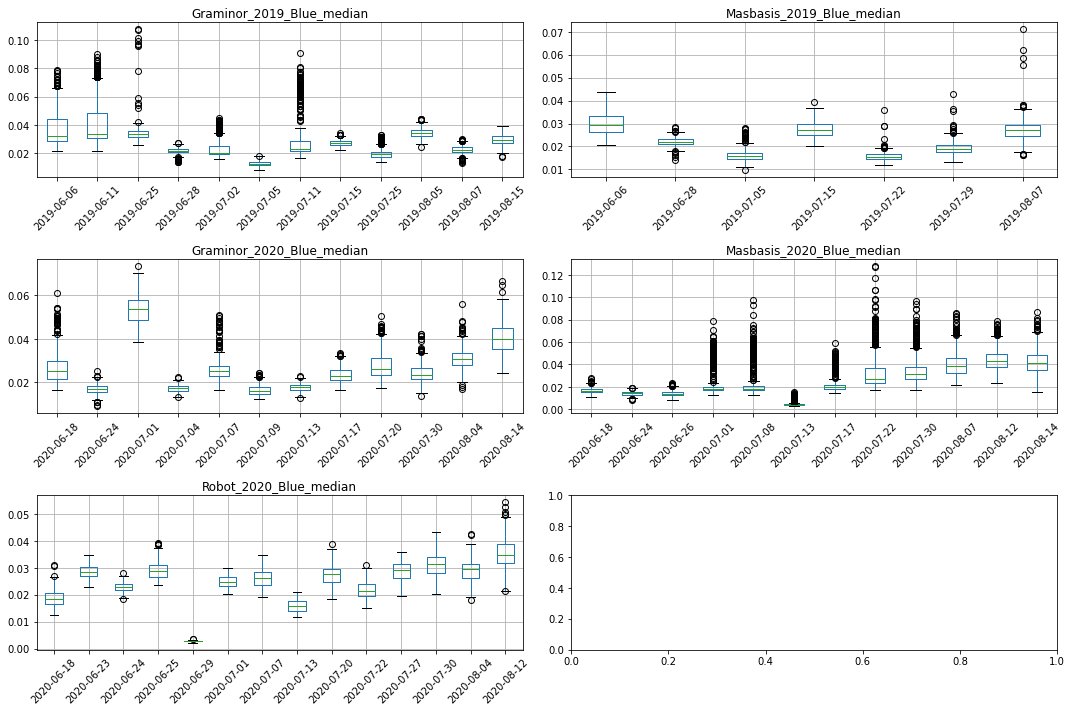

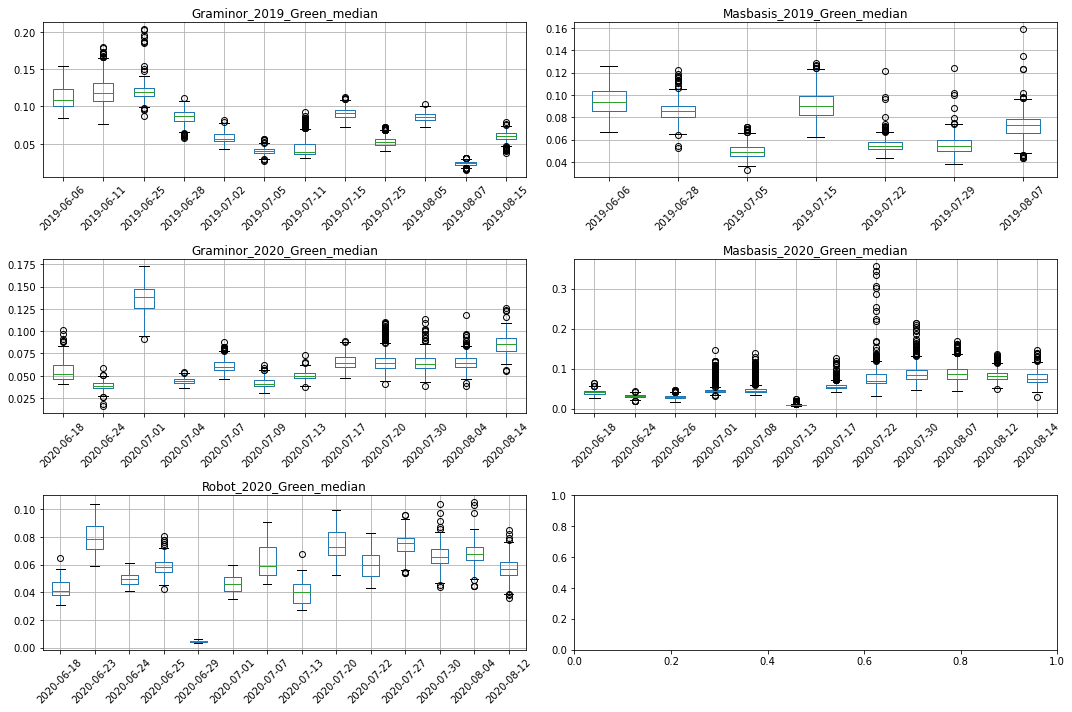

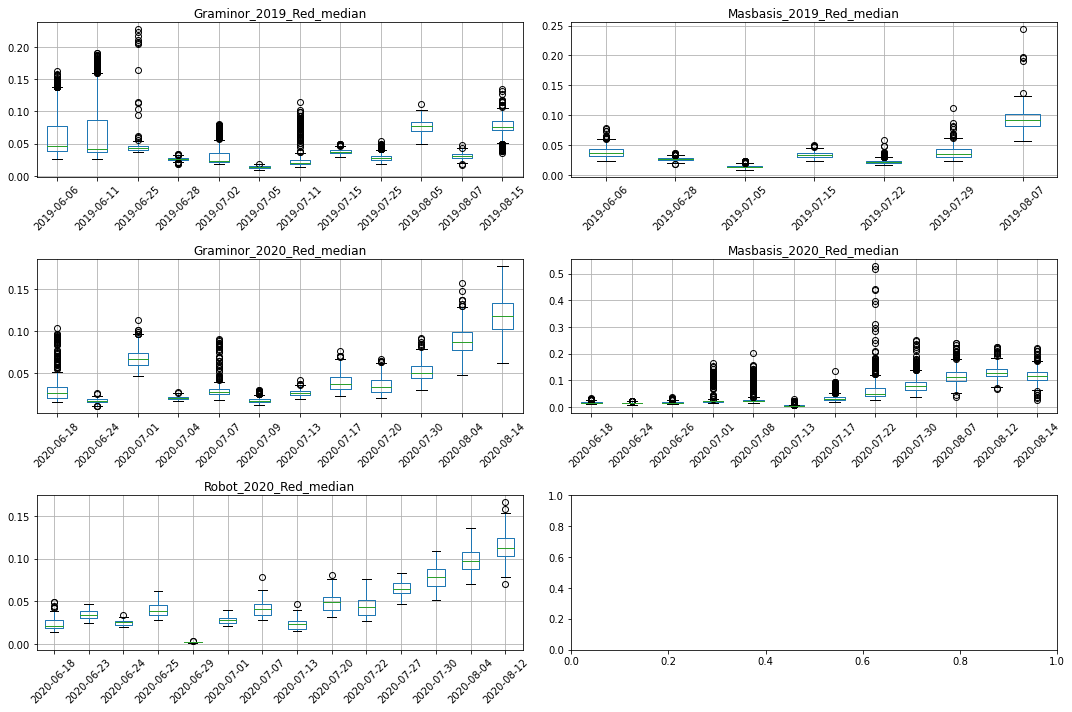

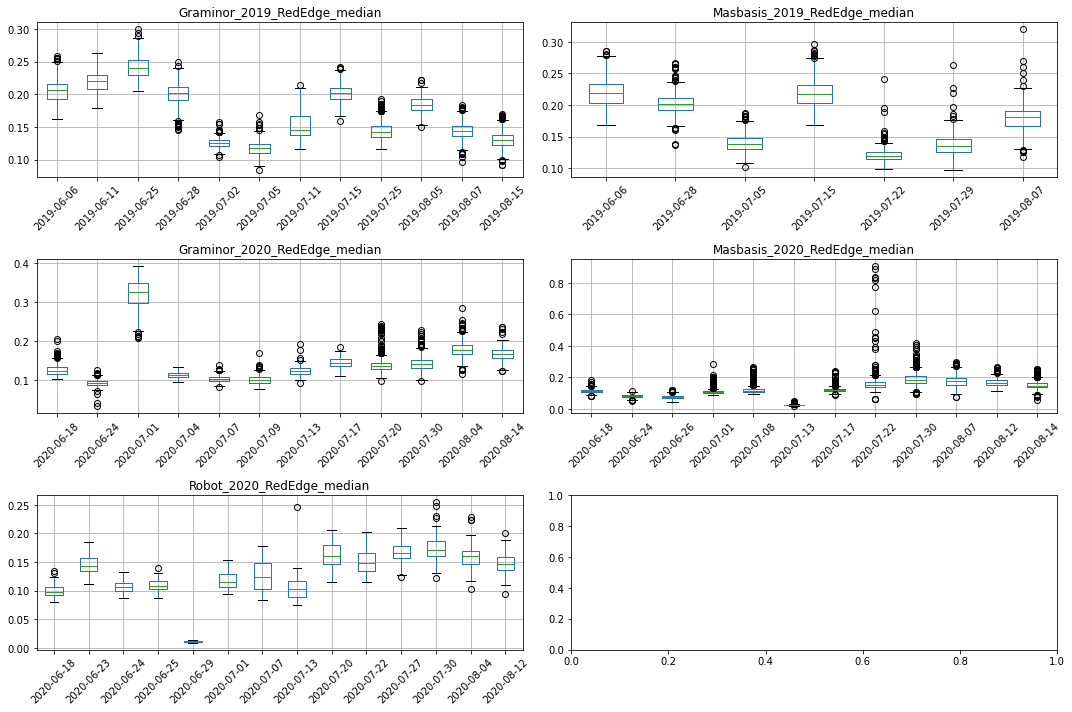

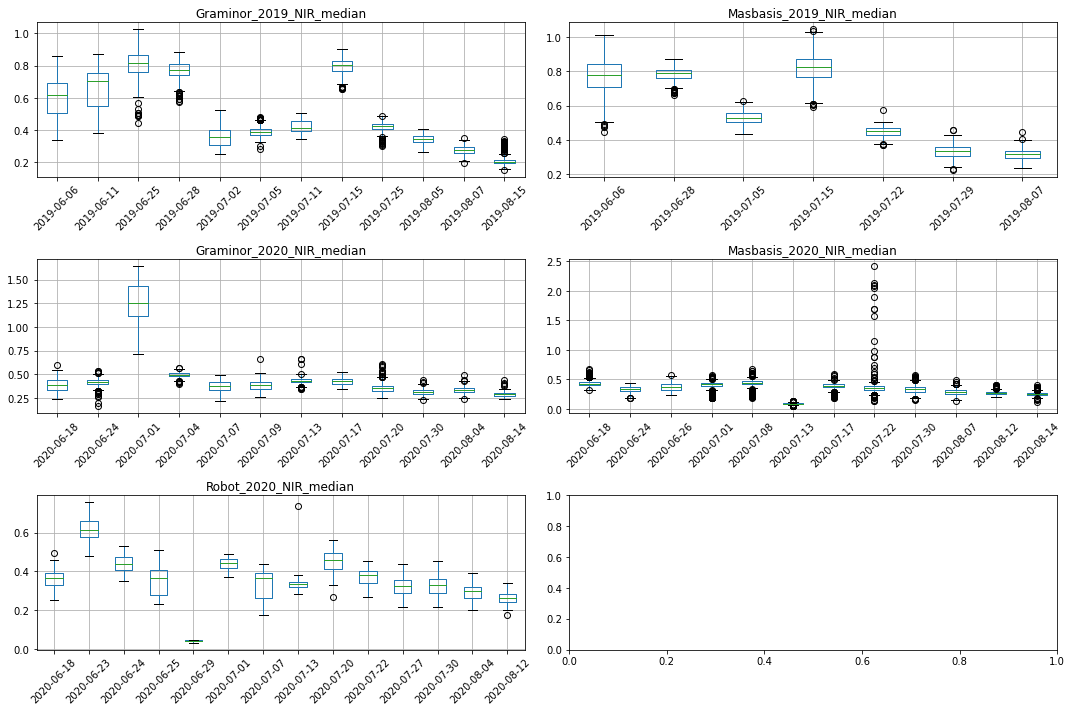

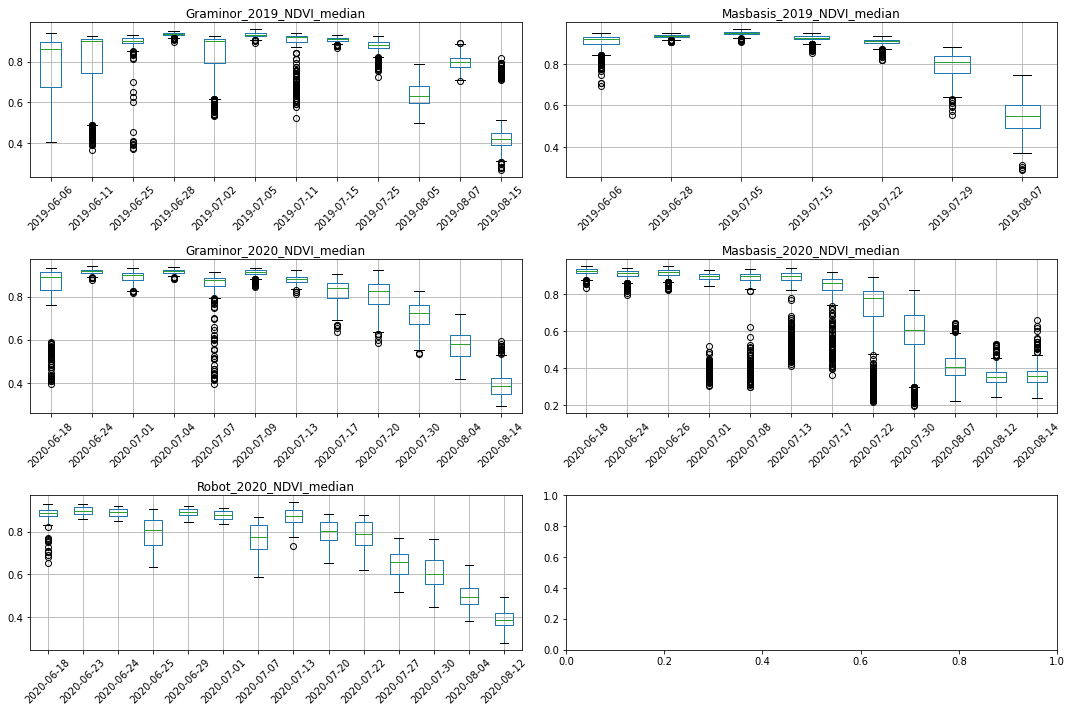

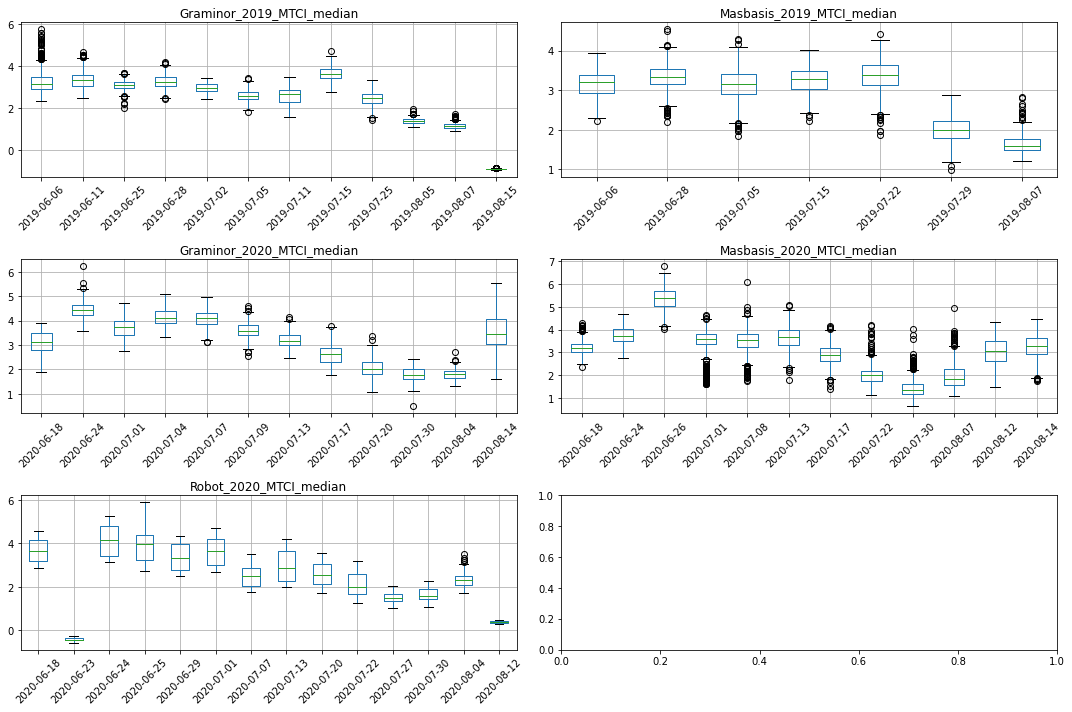

In [116]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']
# data_agg_list = ['_mean_full', '_median_full', '_stdev_full']

# data_agg_list = ['_mean_full']
data_agg_list = ['_median_full']
# data_agg_list = ['_stdev_full']
# col_for_plotting = general_col_names[1:]

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']
# col_for_plotting = ['RedEdge']
# col_for_plotting = ['NIR']
# col_for_plotting = ['NDVI']
# col_for_plotting = ['MTCI']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(sorted_field_year_dict.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in sorted_field_year_dict.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                temp_df[date] = locals()[field_df][col]
            
            # Adding field plot to the subplots
            
            text = "Grain Yield"

            ax_n = plots[n]
            
            temp_df.boxplot(ax=ax_n)
            x_labels = temp_df.columns.tolist()
            ax_n.set_xticklabels(x_labels, rotation=45)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5])
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



In [37]:
field_year_dict

{'Graminor_2019': ['070819',
  '150819',
  '050819',
  '050819',
  '250719',
  '050719',
  '150719',
  '020719',
  '110719',
  '060619',
  '110619',
  '280619',
  '250619'],
 'Masbasis_2019': ['050719',
  '050719',
  '060619',
  '070819',
  '070819',
  '150719',
  '220719',
  '220719',
  '290719',
  '280619'],
 'Graminor_2020': ['010720',
  '040720',
  '040820',
  '070720',
  '130720',
  '140820',
  '170720',
  '180620',
  '200720',
  '240620',
  '300720',
  '240620',
  '040720',
  '040820',
  '070720',
  '070720',
  '090720',
  '130720',
  '140820',
  '300720'],
 'Masbasis_2020': ['070820',
  '120820',
  '140820',
  '010720',
  '080720',
  '130720',
  '170720',
  '220720',
  '300720',
  '180620',
  '240620',
  '260620'],
 'Robot_2020': ['010720',
  '040820',
  '070720',
  '120820',
  '130720',
  '180620',
  '200720',
  '220720',
  '230620',
  '240620',
  '250620',
  '270720',
  '290620',
  '300720']}

In [ ]:
# 

In [ ]:
for field_sample, dates in field_year_dict.items():

    # Adding required data to a temp dataframe
    temp_df = pd.DataFrame()
    for date in dates:
        field_df = field_sample[:-5]+'_'+date+d_type
        temp_df[date] = locals()[field_df][col]

In [ ]:
# Masbasis_140820_mean_full

In [ ]:
# list_df_all_indices

# Data Trends

## Normal Distribution of data

ToDo:  
see the dist of data if it is normal  
else make transpose to make it normal  
dist in Gausion function   
in each field  
what if the data is normal dist?  
the use some transpose to box pox   
try diff funct to see which one iis able to make data normal  
make heat map of whole if not normal  
see which parts are not normal and exculde them  
ls_means in R to make the normalisation/transpose  
pearson corr bw yield and indices for diff dates  


### Yeo-Johnson Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_full']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in field_year_dict.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                field_df = field_sample[:-5]+'_'+date+d_type
                temp_df[date] = locals()[field_df][col]
            x_labels = temp_df.columns.tolist()

            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='yeo-johnson', standardize=False)

            temp_arr = pt.fit_transform(temp_df)
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]
            
            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=45)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5])
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### Box-Cox Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_full']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in field_year_dict.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                field_df = field_sample[:-5]+'_'+date+d_type
                temp_df[date] = locals()[field_df][col]
            x_labels = temp_df.columns.tolist()

            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='box-cox', standardize=False)

            temp_arr = pt.fit_transform(temp_df)
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]

            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=0)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5])
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### ToDo: Identify Dates and index with problems

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Take average of data for date 20200708 and 20200624  
Masbasis  
Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

### Find AUC for all dates of one field
See if it covers tha gaps under the dates,i.e.

Since data points are different  
Flying time is different  
Cover the gaps between the dates  

Since the data collection is not uniform throughout the year so AUC will give a single value instead of multiple values for one field year which will be representative of all the dates 

#### Option 1: Use Scipy

In [ ]:
# from scipy.integrate import simpson

#### Option 2

In [ ]:
data
# plot: Plot ID
# x: Number of days after sowing or actual date
# y: Value of the index

In [ ]:

data={'plot':['1','1','2','2','3','3'],'x':['5','6','7','8','9','10'],'y':['0.9','0.8','0.7','0.6','0.5','0.4'] }

ACC=[]
A=pd.DataFrame(data, columns=['plot','x','y'])
AA=0

for item in range(len(A)-1):
    if A['plot'][item]== A['plot'][item+1]:
        Ans=(float((A['y'][item]))+float((A['y'][item+1])))*((float((A['x'][item+1]))-float((A['x'][item]))))/2
        AA+=Ans
        print(AA)
        ACC.append(AA)

### Alternative

In [ ]:
df1=Data.set_index(['Plot'])
ACC=[]

for item in Numbers_final:
    df2=df1[df1.index==item]
    df2=df2.filter(['Blue', 'Green', 'Red', 'RedEdge', 'NIR','NDVI', 'MTCI', 'EVI', 'DVI', 'RVI', 'VARI', 'EXG', 'EXGR', 'GLI', 'GNDVI', 'GVI','Time','timepoint'], axis=1)
    df2=df2.sort_values(by='timepoint')
    df3=df2.reset_index()

AA=0
for j in range(0,3):
    Ans=(float((df3['GVI'][j]))+float((df3['GVI'][j+1])))*((float((df3['timepoint'][j+1]))-float((df3['timepoint'][j]))))/2
    AA+=Ans

    print(AA)
    ACC.append(AA)



DA=pd.DataFrame(ACC)
DD=pd.DataFrame(Numbers_final)
DDA=pd.concat([DD, DA], axis=1)
DDA.to_excel('Staur_Accumulative_GVI_2019.xlsx')

### Time series data vs the AUC

# ToDo: Model Training


Make model for one year at a time and try to predict yield of another field  

TODO: Train on Masbasis 2019 an 2020  
Test on Staur  

Use data until august for yield prediction since it is most relavant  
Use all data for predicting date to maturity  

Data Collection:  
Data collection usually starts after heading  
2019 has the data before hading as well. To use that, dont use dates before heading  

NDVI is resistant to shadows  

DAT390 Report: Do the report with Robot Data only  

TODO: Use AUC for each index for prediction  

TODO:   
Time series data vs the AUC  